In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv("C://Users//hp//Downloads//house_price.csv")

In [3]:
data

,Area_sqft,Bedrooms,Bathrooms,Age_of_House,Parking_Space,City,Water_Source,Price
0,1698.0,3,3,7.0,1,Kochi,Corporation,4414136.460
1,1444.0,3,3,10.0,2,Trivandrum,Borewell,3299590.581
2,1759.0,2,3,8.0,1,Kochi,Borewell,4562495.020
3,2109.0,3,2,4.0,1,Thrissur,Corporation,4140639.553
4,1406.0,1,2,13.0,2,Alappuzha,Well,2603207.455
...,...,...,...,...,...,...,...,...
220,1539.0,3,1,17.0,1,Thrissur,Corporation,3035400.833
221,1075.0,3,1,7.0,1,Trivandrum,Well,2465948.669
222,704.0,3,1,26.0,1,Kochi,Corporation,1807884.473
223,NaN,3,3,NaN,1,Kochi,Well,3089173.938


In [4]:
data.duplicated().sum()

np.int64(5)

In [5]:
data=data.drop_duplicates()

In [6]:
data.duplicated().sum()

np.int64(0)

In [7]:
data.isnull().sum()

Area_sqft        7
Bedrooms         0
Bathrooms        0
Age_of_House     7
Parking_Space    0
City             0
Water_Source     0
Price            0
dtype: int64

In [8]:
data=data.dropna()

In [9]:
data.isnull().sum()

Area_sqft        0
Bedrooms         0
Bathrooms        0
Age_of_House     0
Parking_Space    0
City             0
Water_Source     0
Price            0
dtype: int64

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 208 entries, 0 to 219
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Area_sqft      208 non-null    float64
 1   Bedrooms       208 non-null    int64  
 2   Bathrooms      208 non-null    int64  
 3   Age_of_House   208 non-null    float64
 4   Parking_Space  208 non-null    int64  
 5   City           208 non-null    object 
 6   Water_Source   208 non-null    object 
 7   Price          208 non-null    float64
dtypes: float64(3), int64(3), object(2)
memory usage: 14.6+ KB


In [11]:
data

,Area_sqft,Bedrooms,Bathrooms,Age_of_House,Parking_Space,City,Water_Source,Price
0,1698.0,3,3,7.0,1,Kochi,Corporation,4414136.460
1,1444.0,3,3,10.0,2,Trivandrum,Borewell,3299590.581
2,1759.0,2,3,8.0,1,Kochi,Borewell,4562495.020
3,2109.0,3,2,4.0,1,Thrissur,Corporation,4140639.553
4,1406.0,1,2,13.0,2,Alappuzha,Well,2603207.455
...,...,...,...,...,...,...,...,...
215,1803.0,3,1,21.0,0,Alappuzha,Well,3343585.633
216,1190.0,3,1,25.0,0,Kozhikode,Corporation,2436806.773
217,1405.0,4,2,27.0,1,Thrissur,Borewell,2754900.572
218,1305.0,3,2,17.0,1,Kozhikode,Well,2698017.935


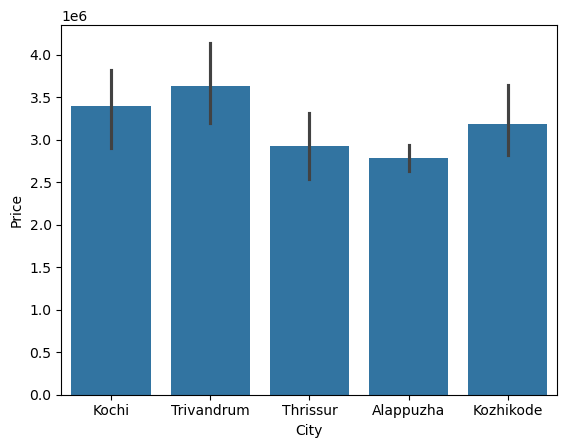

In [12]:
sns.barplot(data,x="City",y="Price")
plt.show()

In [13]:
data["Water_Source"].unique()

array(['Corporation', 'Borewell', 'Well'], dtype=object)

In [14]:
data["Water_Source_new"]=data["Water_Source"].map({'Corporation':3,'Borewell':2,'Well':1})

In [15]:
data

,Area_sqft,Bedrooms,Bathrooms,Age_of_House,Parking_Space,City,Water_Source,Price,Water_Source_new
0,1698.0,3,3,7.0,1,Kochi,Corporation,4414136.460,3
1,1444.0,3,3,10.0,2,Trivandrum,Borewell,3299590.581,2
2,1759.0,2,3,8.0,1,Kochi,Borewell,4562495.020,2
3,2109.0,3,2,4.0,1,Thrissur,Corporation,4140639.553,3
4,1406.0,1,2,13.0,2,Alappuzha,Well,2603207.455,1
...,...,...,...,...,...,...,...,...,...
215,1803.0,3,1,21.0,0,Alappuzha,Well,3343585.633,1
216,1190.0,3,1,25.0,0,Kozhikode,Corporation,2436806.773,3
217,1405.0,4,2,27.0,1,Thrissur,Borewell,2754900.572,2
218,1305.0,3,2,17.0,1,Kozhikode,Well,2698017.935,1


In [16]:
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression

In [17]:
data.columns

Index(['Area_sqft', 'Bedrooms', 'Bathrooms', 'Age_of_House', 'Parking_Space',
       'City', 'Water_Source', 'Price', 'Water_Source_new'],
      dtype='object')

In [18]:
X=data[['Area_sqft', 'Bedrooms', 'Bathrooms', 'Age_of_House', 'Parking_Space','Water_Source_new']]
y=data["Price"]

In [19]:
y

0      4414136.460
1      3299590.581
2      4562495.020
3      4140639.553
4      2603207.455
          ...     
215    3343585.633
216    2436806.773
217    2754900.572
218    2698017.935
219    3953560.057
Name: Price, Length: 208, dtype: float64

In [20]:
from sklearn.preprocessing import LabelEncoder

In [21]:
le=LabelEncoder()

In [22]:
data["Water_source_le"]=le.fit_transform(data["Water_Source"])

In [23]:
data

,Area_sqft,Bedrooms,Bathrooms,Age_of_House,Parking_Space,City,Water_Source,Price,Water_Source_new,Water_source_le
0,1698.0,3,3,7.0,1,Kochi,Corporation,4414136.460,3,1
1,1444.0,3,3,10.0,2,Trivandrum,Borewell,3299590.581,2,0
2,1759.0,2,3,8.0,1,Kochi,Borewell,4562495.020,2,0
3,2109.0,3,2,4.0,1,Thrissur,Corporation,4140639.553,3,1
4,1406.0,1,2,13.0,2,Alappuzha,Well,2603207.455,1,2
...,...,...,...,...,...,...,...,...,...,...
215,1803.0,3,1,21.0,0,Alappuzha,Well,3343585.633,1,2
216,1190.0,3,1,25.0,0,Kozhikode,Corporation,2436806.773,3,1
217,1405.0,4,2,27.0,1,Thrissur,Borewell,2754900.572,2,0
218,1305.0,3,2,17.0,1,Kozhikode,Well,2698017.935,1,2


In [24]:
le.classes_

array(['Borewell', 'Corporation', 'Well'], dtype=object)

In [25]:
data['City'].unique()

array(['Kochi', 'Trivandrum', 'Thrissur', 'Alappuzha', 'Kozhikode'],
      dtype=object)

In [26]:
encoded_data=pd.get_dummies(data,columns=["City"],dtype=int)

In [27]:
encoded_data

,Area_sqft,Bedrooms,Bathrooms,Age_of_House,Parking_Space,Water_Source,Price,Water_Source_new,Water_source_le,City_Alappuzha,City_Kochi,City_Kozhikode,City_Thrissur,City_Trivandrum
0,1698.0,3,3,7.0,1,Corporation,4414136.460,3,1,0,1,0,0,0
1,1444.0,3,3,10.0,2,Borewell,3299590.581,2,0,0,0,0,0,1
2,1759.0,2,3,8.0,1,Borewell,4562495.020,2,0,0,1,0,0,0
3,2109.0,3,2,4.0,1,Corporation,4140639.553,3,1,0,0,0,1,0
4,1406.0,1,2,13.0,2,Well,2603207.455,1,2,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
215,1803.0,3,1,21.0,0,Well,3343585.633,1,2,1,0,0,0,0
216,1190.0,3,1,25.0,0,Corporation,2436806.773,3,1,0,0,1,0,0
217,1405.0,4,2,27.0,1,Borewell,2754900.572,2,0,0,0,0,1,0
218,1305.0,3,2,17.0,1,Well,2698017.935,1,2,0,0,1,0,0


In [28]:
X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=0.2, random_state=42)

In [29]:
model=LinearRegression()
model

LinearRegression()

In [30]:
X_train

,Area_sqft,Bedrooms,Bathrooms,Age_of_House,Parking_Space,Water_Source_new
91,1887.0,1,1,14.0,0,2
215,1803.0,3,1,21.0,0,1
71,2115.0,3,3,22.0,1,2
87,1631.0,3,2,12.0,1,1
217,1405.0,4,2,27.0,1,2
...,...,...,...,...,...,...
111,1489.0,3,1,10.0,1,3
14,810.0,2,2,25.0,1,2
97,1604.0,4,1,3.0,2,1
189,894.0,5,2,10.0,1,2


In [31]:
model.fit(X_train,y_train)

LinearRegression()

In [32]:
from sklearn.preprocessing import StandardScaler

In [33]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [34]:
model = LinearRegression()
model.fit(X_train_scaled, y_train)

LinearRegression()

In [35]:
y_pred = model.predict(X_test_scaled)

In [36]:
y_pred

array([3400147.29264147, 2473469.55632736, 3192064.180797  ,
       2905756.50818761, 3812095.4546519 , 3593235.32602569,
       3402947.55346141, 4076688.88241831, 2685808.41029861,
       3794283.64516522, 5590584.53618085, 2745985.20196084,
       3767883.38365313, 2910635.70332262, 3153267.92316038,
       6512576.65841086, 3198116.40697851, 3729258.88865768,
       3389964.18211662, 1636256.93039273, 1963584.78810992,
       2905444.38806661, 3206808.51247184, 4827070.78873085,
       4054199.5957004 , 3539371.46164526, 2357676.99765213,
       2784238.3257915 , 2181802.14260746, 3679302.23292633,
       2183569.83052686, 2962367.29847252, 3353293.75202441,
       4845583.46764282, 3350801.26657705, 2418810.15459061,
       3637808.81387439, 3562543.24459884, 4226345.03220987,
       4048407.85860867, 4408347.54006564, 2867434.05940559])

In [37]:
from sklearn.metrics import mean_absolute_percentage_error
mean_absolute_percentage_error(y_test, y_pred)*100

5.9947034366493625e+22

In [39]:
data.columns

Index(['Area_sqft', 'Bedrooms', 'Bathrooms', 'Age_of_House', 'Parking_Space',
       'City', 'Water_Source', 'Price', 'Water_Source_new', 'Water_source_le'],
      dtype='object')

In [55]:
new=pd.DataFrame({'Area_sqft':[2000],
                  'Bedrooms':[5],
                  'Bathrooms':[2],
                  'Age_of_House':[20],
                  'Parking_Space':[2],
                  'Water_Source_new':[3]})

In [62]:
model_accuracy=100-(mean_absolute_percentage_error(y_test, y_pred))*100
print("Model Accuracy: ",model_accuracy)

Model Accuracy:  -5.9947034366493625e+22


In [58]:
import warnings
warnings.filterwarnings("ignore")

In [59]:
model.predict(new)
print("predicted mileage: ",model.predict(new)[0])


predicted mileage:  1446131128.8766723


In [46]:
new_scaled=scaler.transform(new)

In [47]:
model.predict(new_scaled)

array([4149655.75930792])